In [1]:
import pandas as pd

df = pd.read_csv('./diabetes.csv')

df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    plt.figure(figsize=(6,3))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

X_train.shape, X_test.shape

((614, 8), (154, 8))

## Baseline

In [7]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=200)
lr_clf.fit(X_train , y_train)

pred = lr_clf.predict(X_test)
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba_class1)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC:0.8072


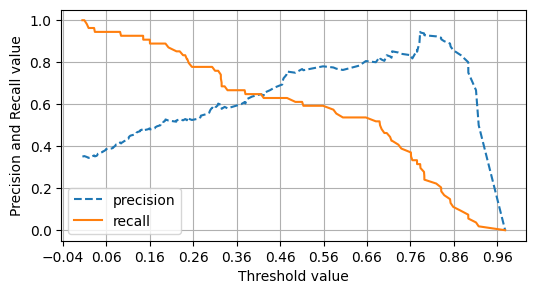

In [8]:
precision_recall_curve_plot(y_test, pred_proba_class1)

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

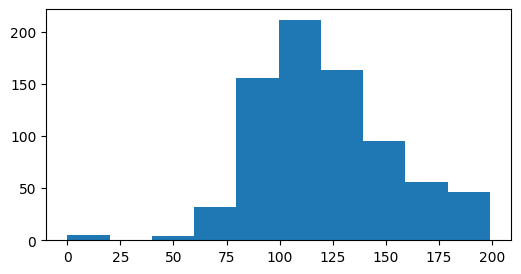

In [9]:
plt.figure(figsize=(6,3))
plt.hist(df['Glucose'], bins=10)

## NaN / 0 값 처리

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
total_count = df['Glucose'].count()
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

for feature in zero_features:
    zero_count = df[df[feature] == 0][feature].count()
    print('{0:>13} 0 건수는 {1:>3}, 퍼센트는 {2:5.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

      Glucose 0 건수는   5, 퍼센트는  0.65 %
BloodPressure 0 건수는  35, 퍼센트는  4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
      Insulin 0 건수는 374, 퍼센트는 48.70 %
          BMI 0 건수는  11, 퍼센트는  1.43 %


In [12]:
df[zero_features] = df[zero_features].replace(0, df[zero_features].mean())

for feature in zero_features:
    zero_count = df[df[feature] == 0][feature].count()
    print('{0:>13} 0 건수는 {1:>3}, 퍼센트는 {2:5.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

      Glucose 0 건수는   0, 퍼센트는  0.00 %
BloodPressure 0 건수는   0, 퍼센트는  0.00 %
SkinThickness 0 건수는   0, 퍼센트는  0.00 %
      Insulin 0 건수는   0, 퍼센트는  0.00 %
          BMI 0 건수는   0, 퍼센트는  0.00 %


## Standardization

In [13]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

X_train.shape, X_test.shape

((614, 8), (154, 8))

In [14]:
lr_clf = LogisticRegression(max_iter=200)
lr_clf.fit(X_train , y_train)

pred = lr_clf.predict(X_test)
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba_class1)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC:0.8433


## Threshold Set

In [15]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold)
        custom_predict = binarizer.fit_transform(pred_proba_c1.reshape(-1,1))
        
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)
        print()

In [16]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
get_eval_by_threshold(y_test, pred_proba_class1, thresholds)

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1: 0.6615, AUC:0.8433

임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1: 0.6774, AUC:0.8433

임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1: 0.6667, AUC:0.8433

임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667, AUC:0.8433

임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792, AUC:0.8433

임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857, AUC:0.8433

임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC:0.8433

임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC:0.8433



In [17]:
binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba_class1.reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba_class1)

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC:0.8433
